In [97]:
import wfdb
from FeatureExtraction_NB import processing,process_signal,process_qrs
import matplotlib.pyplot as plt

In [98]:
fs = 1000
# best start = 1300, best end = 3200
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1])
patient_3 = wfdb.rdrecord('..//01.Dataset/105/s0303lre', channels=[1])
patient_4 = wfdb.rdrecord('..//01.Dataset/104/s0306lre', channels=[1])

signal_1 = patient_1.p_signal[: ,0]
signal_2 = patient_2.p_signal[:, 0]
signal_3 = patient_3.p_signal[:, 0]
signal_4 = patient_4.p_signal[:, 0]

time = len(signal_1)/ fs

In [99]:
def get_Rs(signal):
    denoised_signal, y_lfiltered, window_smoothed_signal = processing(signal)
    qx, qy, sx, sy = process_signal(denoised_signal, y_lfiltered)
    qx, qy, sx, sy, Rx, Ry, qrs_on_x, qrs_on_y, qrs_off_x, qrs_off_y = process_qrs(denoised_signal, y_lfiltered, window_smoothed_signal, qx, qy, sx, sy)
    return denoised_signal,Rx

In [100]:
denoised_signal,Rx = get_Rs(signal_1)
Rx

array([   495,   1367,   2251,   3152,   4024,   4894,   5789,   6685,
         7571,   8447,   9341,  10233,  11130,  11991,  12873,  13777,
        14664,  15523,  16390,  17258,  18144,  19005,  19878,  20793,
        21724,  22626,  23501,  24429,  25380,  26303,  27182,  28084,
        28992,  29883,  30753,  31642,  32552,  33471,  34391,  35316,
        36240,  37139,  38012,  38892,  39790,  40703,  41574,  42460,
        43385,  44338,  45247,  46169,  47096,  48001,  48862,  49742,
        50686,  51658,  52578,  53466,  54368,  55258,  56112,  56964,
        57855,  58746,  59603,  60464,  61339,  62213,  63052,  63888,
        64747,  65603,  66432,  67261,  68103,  68948,  69799,  70637,
        71491,  72362,  73264,  74143,  75030,  75914,  76790,  77645,
        78492,  79365,  80254,  81113,  81980,  82876,  83783,  84663,
        85543,  86426,  87324,  88180,  89029,  89906,  90789,  91675,
        92561,  93450,  94379,  95320,  96209,  97096,  97987,  98884,
      

In [101]:
nonFiducials_for_Full_signal = []

for i in range(1,len(Rx)-1):
    RR_previous = Rx[i]-Rx[i-1]
    RR_next = Rx[i+1]-Rx[i]

    nonFiducial=[]

    after_Rpeak = int (2/3*((RR_previous+RR_next)/2))

    for x in range( int(Rx[i]) , int(Rx[i])+after_Rpeak) :
        nonFiducial.append( denoised_signal[x])

    Before_Rpeak = int (1/3*((RR_previous+RR_next)/2))

    for j in range(Before_Rpeak+int(Rx[i-1]) , int(Rx[i]) ):
        nonFiducial.append( denoised_signal[j])
        
    nonFiducials_for_Full_signal.append(nonFiducial)

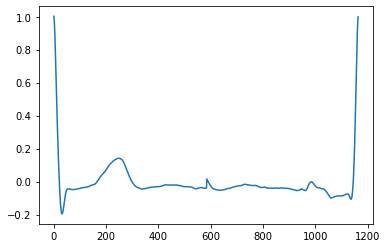

In [102]:
plt.plot(nonFiducials_for_Full_signal[0])

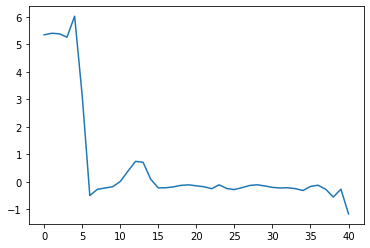

In [103]:
import pywt
import numpy as np

# Define the mother wavelet
wavelet = pywt.Wavelet('db4')

# Define the number of levels for decomposition
decomp_levels = 5

# Define the list of ECG signals
ecg_segments = np.array(nonFiducials_for_Full_signal[0])  # Example data

# Decompose the signal
decomp = pywt.wavedec(ecg_segments, wavelet, level=decomp_levels)

CA5,CD5,CD4,CD3,CD2,CD1 =decomp 

#only the coefficients of ECG band (1-40) use them as a feature 
non_fiducial_feature = CA5[:41]

plt.plot(non_fiducial_feature)

In [104]:
denoised_signal,Rx = get_Rs(signal_1)
nonFiducials_for_Full_signal_1 = []

for i in range(1,len(Rx)-1):
    RR_previous = Rx[i]-Rx[i-1]
    RR_next = Rx[i+1]-Rx[i]

    nonFiducial=[]

    after_Rpeak = int (2/3*((RR_previous+RR_next)/2))

    for x in range( int(Rx[i]) , int(Rx[i])+after_Rpeak) :
        nonFiducial.append( denoised_signal[x])

    Before_Rpeak = int (1/3*((RR_previous+RR_next)/2))

    for j in range(Before_Rpeak+int(Rx[i-1]) , int(Rx[i]) ):
        nonFiducial.append( denoised_signal[j])
        
    nonFiducials_for_Full_signal_1.append(nonFiducial)
    
import pywt
import numpy as np

list_of_non_fiducial_features_1 = []
for i in range(len(nonFiducials_for_Full_signal_1)):
    # Define the mother wavelet
    wavelet = pywt.Wavelet('db4')

    # Define the number of levels for decomposition
    decomp_levels = 5

    # Define the list of ECG signals
    ecg_segments = np.array(nonFiducials_for_Full_signal_1[i])  # Example data

    # Decompose the signal
    decomp = pywt.wavedec(ecg_segments, wavelet, level=decomp_levels)

    CA5,CD5,CD4,CD3,CD2,CD1 =decomp 

    #only the coefficients of ECG band (1-40) use them as a feature 
    non_fiducial_feature = CA5[:41]
    list_of_non_fiducial_features_1.append(non_fiducial_feature)


In [105]:
denoised_signal,Rx = get_Rs(signal_2)
nonFiducials_for_Full_signal_2 = []

for i in range(1,len(Rx)-1):
    RR_previous = Rx[i]-Rx[i-1]
    RR_next = Rx[i+1]-Rx[i]

    nonFiducial=[]

    after_Rpeak = int (2/3*((RR_previous+RR_next)/2))

    for x in range( int(Rx[i]) , int(Rx[i])+after_Rpeak) :
        nonFiducial.append( denoised_signal[x])

    Before_Rpeak = int (1/3*((RR_previous+RR_next)/2))

    for j in range(Before_Rpeak+int(Rx[i-1]) , int(Rx[i]) ):
        nonFiducial.append( denoised_signal[j])
        
    nonFiducials_for_Full_signal_2.append(nonFiducial)
    
import pywt
import numpy as np

list_of_non_fiducial_features_2 = []
for i in range(len(nonFiducials_for_Full_signal_2)):
    # Define the mother wavelet
    wavelet = pywt.Wavelet('db4')

    # Define the number of levels for decomposition
    decomp_levels = 5

    # Define the list of ECG signals
    ecg_segments = np.array(nonFiducials_for_Full_signal_2[i])  # Example data

    # Decompose the signal
    decomp = pywt.wavedec(ecg_segments, wavelet, level=decomp_levels)

    CA5,CD5,CD4,CD3,CD2,CD1 =decomp 

    #only the coefficients of ECG band (1-40) use them as a feature 
    non_fiducial_feature = CA5[:41]
    list_of_non_fiducial_features_2.append(non_fiducial_feature)


In [106]:
denoised_signal,Rx = get_Rs(signal_3)
nonFiducials_for_Full_signal_3 = []

for i in range(1,len(Rx)-1):
    RR_previous = Rx[i]-Rx[i-1]
    RR_next = Rx[i+1]-Rx[i]

    nonFiducial=[]

    after_Rpeak = int (2/3*((RR_previous+RR_next)/2))

    for x in range( int(Rx[i]) , int(Rx[i])+after_Rpeak) :
        nonFiducial.append( denoised_signal[x])

    Before_Rpeak = int (1/3*((RR_previous+RR_next)/2))

    for j in range(Before_Rpeak+int(Rx[i-1]) , int(Rx[i]) ):
        nonFiducial.append( denoised_signal[j])
        
    nonFiducials_for_Full_signal_3.append(nonFiducial)
    
import pywt
import numpy as np

list_of_non_fiducial_features_3 = []
for i in range(len(nonFiducials_for_Full_signal_3)):
    # Define the mother wavelet
    wavelet = pywt.Wavelet('db4')

    # Define the number of levels for decomposition
    decomp_levels = 5

    # Define the list of ECG signals
    ecg_segments = np.array(nonFiducials_for_Full_signal_3[i])  # Example data

    # Decompose the signal
    decomp = pywt.wavedec(ecg_segments, wavelet, level=decomp_levels)

    CA5,CD5,CD4,CD3,CD2,CD1 =decomp 

    #only the coefficients of ECG band (1-40) use them as a feature 
    non_fiducial_feature = CA5[:41]
    list_of_non_fiducial_features_3.append(non_fiducial_feature)


In [107]:
for i in list_of_non_fiducial_features_3:
    print(len(i))

39
38
38
39
41
41
40
38
39
38
37
37
38
39
38
37
38
39
39
38
38
39
40
40
39
38
39
40
38
38
39
40
39
38
39
41
41
41
40
39
40
40
40
40
39
38
38
37
38
40
41
41
41
39
39
38
39
40
41
41
40
40
40
41
41
41
41
39
39
39
40
40
39
39
40
40
41
40
39
38
38
38
39
38
37
37
38
38
37
37
37
37
37
37
38
37
37
37
38
39
38
37
37
38
38
38
37
36
37
37
37
36
36
37
37
36
36
36
37
38
37
37
38
39
39
38
37
37
38
38
37
37
37
38
37
37
37
38
37
37
38
38
38
37
36
37
38


In [108]:
denoised_signal,Rx = get_Rs(signal_4)
nonFiducials_for_Full_signal_4 = []

for i in range(1,len(Rx)-1):
    RR_previous = Rx[i]-Rx[i-1]
    RR_next = Rx[i+1]-Rx[i]

    nonFiducial=[]

    after_Rpeak = int (2/3*((RR_previous+RR_next)/2))

    for x in range( int(Rx[i]) , int(Rx[i])+after_Rpeak) :
        nonFiducial.append( denoised_signal[x])

    Before_Rpeak = int (1/3*((RR_previous+RR_next)/2))

    for j in range(Before_Rpeak+int(Rx[i-1]) , int(Rx[i]) ):
        nonFiducial.append( denoised_signal[j])
        
    nonFiducials_for_Full_signal_4.append(nonFiducial)
    
import pywt
import numpy as np

list_of_non_fiducial_features_4 = []
for i in range(len(nonFiducials_for_Full_signal_4)):
    # Define the mother wavelet
    wavelet = pywt.Wavelet('db4')

    # Define the number of levels for decomposition
    decomp_levels = 5

    # Define the list of ECG signals
    ecg_segments = np.array(nonFiducials_for_Full_signal_4[i])  # Example data

    # Decompose the signal
    decomp = pywt.wavedec(ecg_segments, wavelet, level=decomp_levels)

    CA5,CD5,CD4,CD3,CD2,CD1 =decomp 

    #only the coefficients of ECG band (1-40) use them as a feature 
    non_fiducial_feature = CA5[:41]
    list_of_non_fiducial_features_4.append(non_fiducial_feature)


In [109]:
for i in list_of_non_fiducial_features_4:
    print(len(i))

41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
40
41
40
39
39
41
41
41
41
41
41
41
41
41


In [110]:
import pandas as pd
df = pd.DataFrame({})

In [111]:
list_of_non_fiducial_features_1

[array([ 5.34011902,  5.3981406 ,  5.37652812,  5.25535223,  6.01622326,
         3.12788528, -0.50157891, -0.27573772, -0.22965246, -0.18250249,
         0.00861192,  0.37934847,  0.73920248,  0.70647944,  0.09098812,
        -0.2246325 , -0.21970135, -0.18626644, -0.13126165, -0.11393584,
        -0.14970259, -0.18275859, -0.25329319, -0.11336545, -0.24657211,
        -0.28593809, -0.21498131, -0.13747437, -0.1122258 , -0.1537397 ,
        -0.20670121, -0.22709849, -0.22012123, -0.25120395, -0.3193235 ,
        -0.1715251 , -0.12718299, -0.27577432, -0.55419094, -0.27267214,
        -1.17075615]),
 array([ 5.38519832,  5.44335454,  5.42273282,  5.29875843,  6.06945631,
         3.14984209, -0.47311652, -0.26582005, -0.25072594, -0.17554264,
         0.00955378,  0.3853484 ,  0.78643778,  0.76282418,  0.09844865,
        -0.27005293, -0.28511138, -0.18840183, -0.10226878, -0.08191361,
        -0.13805014, -0.17704197, -0.23205048, -0.18823681, -0.18634393,
        -0.23577598, -0.1958

In [112]:
for i in range(len(list_of_non_fiducial_features_1)):
    df[str(i)] = list_of_non_fiducial_features_1[i]

C:\Users\Samy\AppData\Local\Temp/ipykernel_18932/1364772741.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(i)] = list_of_non_fiducial_features_1[i]


In [113]:
df = df.T

In [114]:
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,5.340119,5.398141,5.376528,5.255352,6.016223,3.127885,-0.501579,-0.275738,-0.229652,-0.182502,...,-0.227098,-0.220121,-0.251204,-0.319324,-0.171525,-0.127183,-0.275774,-0.554191,-0.272672,-1.170756
1,5.385198,5.443355,5.422733,5.298758,6.069456,3.149842,-0.473117,-0.265820,-0.250726,-0.175543,...,-0.223530,-0.219793,-0.251934,-0.239597,-0.280245,-0.029150,-0.183444,-0.430295,-0.513748,-0.823170
2,5.257673,5.319169,5.295182,5.172959,5.943848,3.024982,-0.469796,-0.300838,-0.245856,-0.180566,...,-0.205866,-0.243404,-0.224798,-0.234229,-0.258064,-0.077539,-0.079172,-0.265274,-0.591951,-0.351648
3,5.265324,5.323430,5.300352,5.184091,5.922818,3.115692,-0.430027,-0.255942,-0.210920,-0.131883,...,-0.267678,-0.300963,-0.302156,-0.333799,-0.120050,-0.151405,-0.313568,-0.598088,-0.303525,-1.010084
4,5.380333,5.431111,5.414597,5.295364,6.032062,3.235205,-0.482465,-0.280978,-0.248380,-0.144318,...,-0.251515,-0.280825,-0.301898,-0.341399,-0.143557,-0.123035,-0.285181,-0.598142,-0.351729,-1.214398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.385327,5.439629,5.421382,5.300178,6.048459,3.213015,-0.469928,-0.263215,-0.220170,-0.108427,...,-0.225623,-0.248348,-0.265795,-0.275982,-0.273394,-0.053769,-0.193015,-0.440521,-0.526341,-0.807835
123,5.360300,5.421892,5.398823,5.275111,6.048051,3.123751,-0.437212,-0.279291,-0.222808,-0.129147,...,-0.201835,-0.252525,-0.272475,-0.266577,-0.252308,-0.227287,-0.001482,-0.171485,-0.445893,-0.550504
124,5.368600,5.422798,5.403127,5.285808,6.020288,3.230436,-0.488386,-0.241332,-0.183919,-0.141030,...,-0.258098,-0.245749,-0.263959,-0.237706,-0.264180,-0.040687,-0.101064,-0.303814,-0.560649,-0.311341
125,5.355896,5.405149,5.388378,5.273977,5.986441,3.275617,-0.476182,-0.241862,-0.183064,-0.114569,...,-0.247261,-0.279811,-0.270644,-0.317967,-0.080544,-0.178710,-0.390326,-0.568246,-0.486643,-0.611922


In [115]:
df['class'] = 1

In [116]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,class
0,5.340119,5.398141,5.376528,5.255352,6.016223,3.127885,-0.501579,-0.275738,-0.229652,-0.182502,...,-0.220121,-0.251204,-0.319324,-0.171525,-0.127183,-0.275774,-0.554191,-0.272672,-1.170756,1
1,5.385198,5.443355,5.422733,5.298758,6.069456,3.149842,-0.473117,-0.265820,-0.250726,-0.175543,...,-0.219793,-0.251934,-0.239597,-0.280245,-0.029150,-0.183444,-0.430295,-0.513748,-0.823170,1
2,5.257673,5.319169,5.295182,5.172959,5.943848,3.024982,-0.469796,-0.300838,-0.245856,-0.180566,...,-0.243404,-0.224798,-0.234229,-0.258064,-0.077539,-0.079172,-0.265274,-0.591951,-0.351648,1
3,5.265324,5.323430,5.300352,5.184091,5.922818,3.115692,-0.430027,-0.255942,-0.210920,-0.131883,...,-0.300963,-0.302156,-0.333799,-0.120050,-0.151405,-0.313568,-0.598088,-0.303525,-1.010084,1
4,5.380333,5.431111,5.414597,5.295364,6.032062,3.235205,-0.482465,-0.280978,-0.248380,-0.144318,...,-0.280825,-0.301898,-0.341399,-0.143557,-0.123035,-0.285181,-0.598142,-0.351729,-1.214398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.385327,5.439629,5.421382,5.300178,6.048459,3.213015,-0.469928,-0.263215,-0.220170,-0.108427,...,-0.248348,-0.265795,-0.275982,-0.273394,-0.053769,-0.193015,-0.440521,-0.526341,-0.807835,1
123,5.360300,5.421892,5.398823,5.275111,6.048051,3.123751,-0.437212,-0.279291,-0.222808,-0.129147,...,-0.252525,-0.272475,-0.266577,-0.252308,-0.227287,-0.001482,-0.171485,-0.445893,-0.550504,1
124,5.368600,5.422798,5.403127,5.285808,6.020288,3.230436,-0.488386,-0.241332,-0.183919,-0.141030,...,-0.245749,-0.263959,-0.237706,-0.264180,-0.040687,-0.101064,-0.303814,-0.560649,-0.311341,1
125,5.355896,5.405149,5.388378,5.273977,5.986441,3.275617,-0.476182,-0.241862,-0.183064,-0.114569,...,-0.279811,-0.270644,-0.317967,-0.080544,-0.178710,-0.390326,-0.568246,-0.486643,-0.611922,1


In [117]:
import pandas as pd
df1 = pd.DataFrame({})
for i in range(len(list_of_non_fiducial_features_2)):
    df1[str(i)] = list_of_non_fiducial_features_2[i]

C:\Users\Samy\AppData\Local\Temp/ipykernel_18932/3422289189.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[str(i)] = list_of_non_fiducial_features_2[i]


In [118]:
df1 = df1.T
df1['class'] = 2
df1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,class
0,3.128025,3.196393,3.179005,3.051913,3.779005,1.067900,-0.439762,-0.126983,-0.155724,-0.132720,...,-0.077202,-0.038345,-0.104033,-0.008581,0.000991,-0.035033,-0.094184,-0.062813,0.239633,2
1,3.232031,3.300661,3.282271,3.155276,3.888597,1.149265,-0.372412,-0.055519,-0.070982,-0.052640,...,-0.062356,-0.018132,-0.028961,-0.032453,-0.092848,-0.039704,-0.125192,0.107770,0.237268,2
2,3.458135,3.519143,3.507730,3.374800,4.126287,1.318672,-0.508927,-0.148098,-0.127893,-0.166124,...,0.131286,0.073945,0.040222,0.013202,0.014103,-0.039653,-0.048448,0.213450,0.234011,2
3,3.163746,3.221576,3.211254,3.085088,3.795093,1.141766,-0.566005,-0.244177,-0.133510,-0.125458,...,-0.150861,-0.145419,-0.029131,0.011943,0.092384,0.035808,0.040012,0.384327,0.434346,2
4,3.310922,3.367939,3.357551,3.230245,3.950653,1.261193,-0.586639,-0.194690,-0.114965,-0.028063,...,-0.055634,-0.034728,-0.057989,-0.025190,-0.054722,-0.115571,0.177708,0.312953,0.009640,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,3.168866,3.235442,3.218592,3.091437,3.820781,1.101821,-0.480035,-0.078435,-0.043565,-0.042464,...,-0.079436,-0.002903,-0.047905,-0.127744,-0.168238,-0.115742,0.238842,0.238288,-0.054549,2
113,3.619656,3.684083,3.672276,3.533125,4.315848,1.393057,-0.471881,-0.064304,0.021089,-0.043032,...,-0.187131,-0.172265,-0.140417,-0.105794,-0.106495,-0.160368,0.209006,0.351077,0.097077,2
114,3.420632,3.489915,3.473247,3.340054,4.100253,1.265386,-0.400956,-0.160818,-0.111026,-0.072907,...,-0.082460,-0.109784,-0.139987,-0.124842,-0.139849,-0.203602,0.045502,0.356413,0.109396,2
115,3.170465,3.229861,3.218146,3.091805,3.805631,1.143721,-0.436494,-0.056952,-0.032863,-0.052422,...,-0.057828,-0.065272,-0.054588,-0.003803,0.058186,-0.000888,0.183569,0.336458,0.075707,2


In [119]:

import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

In [120]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=1900)
    
    s1=Auto_corr[0:190]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[0:20]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components[4]

In [121]:
com1= nonFiducial(signal_1)
com2= nonFiducial(signal_2)
com3= nonFiducial(signal_3)
com4= nonFiducial(signal_4)


c:\Users\Samy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [135]:
com1 = com1.reshape(20,1)
com2 = com2.reshape(20,1)
com3 = com3.reshape(20,1)
com4 = com4.reshape(20,1)

com1.shape

(20, 1)

In [136]:
Data = np.concatenate((com1, com2), axis=1)
Data = np.concatenate((Data, com3), axis=1)
#Data = np.concatenate((Data, com4), axis=1)


In [137]:
Data

array([[ 2.68206818e+02,  3.76784233e+02,  1.76460449e+02],
       [ 8.91260756e+00,  4.76243550e-01,  2.42615846e+01],
       [ 1.09993381e+01,  1.15770111e-01,  1.87013729e+01],
       [ 7.03518016e+00,  1.03006437e-01,  1.73306658e+01],
       [ 7.12396515e+00,  1.00505111e-01,  1.25629942e+01],
       [ 6.11557253e+00,  1.33981041e-01,  7.50725222e+00],
       [ 5.49244455e+00,  1.38106618e-01,  7.23459453e+00],
       [ 3.68511230e+00,  1.41258155e-01,  4.94115900e+00],
       [ 2.78465934e+00,  1.25958857e-01,  4.00736337e+00],
       [ 1.62975286e+00,  1.01958776e-01,  2.26654512e+00],
       [ 8.05755125e-01,  6.40662865e-02,  1.50000022e+00],
       [ 4.21907261e-01,  4.87389824e-02,  4.71730037e-01],
       [ 2.12265507e-01,  2.26870919e-02,  5.09645433e-01],
       [ 1.60732696e-01,  1.53417233e-02,  3.30387167e-02],
       [ 1.10981005e-01,  7.09200030e-03,  1.49148019e-01],
       [ 1.43659675e-01,  4.87129987e-03,  2.69946597e-02],
       [ 1.01471119e-01,  1.67816006e-03

In [138]:
Data = Data.T


In [139]:
Data.shape

(3, 20)

In [140]:
Data

array([[ 2.68206818e+02,  8.91260756e+00,  1.09993381e+01,
         7.03518016e+00,  7.12396515e+00,  6.11557253e+00,
         5.49244455e+00,  3.68511230e+00,  2.78465934e+00,
         1.62975286e+00,  8.05755125e-01,  4.21907261e-01,
         2.12265507e-01,  1.60732696e-01,  1.10981005e-01,
         1.43659675e-01,  1.01471119e-01,  9.96002220e-02,
         7.63887693e-02,  7.32932591e-02],
       [ 3.76784233e+02,  4.76243550e-01,  1.15770111e-01,
         1.03006437e-01,  1.00505111e-01,  1.33981041e-01,
         1.38106618e-01,  1.41258155e-01,  1.25958857e-01,
         1.01958776e-01,  6.40662865e-02,  4.87389824e-02,
         2.26870919e-02,  1.53417233e-02,  7.09200030e-03,
         4.87129987e-03,  1.67816006e-03,  2.80838201e-03,
        -4.20615083e-05,  2.13583673e-03],
       [ 1.76460449e+02,  2.42615846e+01,  1.87013729e+01,
         1.73306658e+01,  1.25629942e+01,  7.50725222e+00,
         7.23459453e+00,  4.94115900e+00,  4.00736337e+00,
         2.26654512e+00,  1.5

In [158]:
lables=[1,2,3]

In [159]:

#from sklearn.model_selection import train_test_split

#train_data, test_data, train_labels, test_labels = train_test_split(Data, lables, test_size=0, random_state=42)



In [160]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create and train the SVM classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(Data, lables)

# Make predictions on the test set
y_pred = svm_classifier.predict(Data)

# Calculate accuracy
accuracy = accuracy_score(lables, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [161]:

y_pred = svm_classifier.predict(com4.T)
y_pred

array([2])